- https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e
- https://github.com/gylx/Financial-Machine-Learning-Articles/blob/master/Stock%20Market%20Analytics%20with%20PCA.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')

## PCA(Principal Component Analysis)에 관하여
 - 주어진 데이터를 요약하는 "주성분" 벡터들로 데이터를 분해
 - 데이터의 분산을 가능한 한 많이 설명하도록 하는 인풋의 선형 결합

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project1_Stock_Price/datasets1/kospi200_3yr_pivot.csv')
df.set_index(df['Date'], inplace=True)

In [ ]:
# df.reset_index(inplace=True)
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
df.isnull()

In [ ]:
df = df.dropna(axis=1)

df

## PCA와 CAPM
 - CAPM에 따르면 주식수익률은 (1) 무위험자산의 수익률, (2) 시장의 초과수익률, (3) 개별종목 고유 수익률로 분해
 - 시장요소가 모든 주식수익률의 주된 동인

KOSPI200에 해당하는 종목들의 일일 수익률 구하기

In [ ]:
rs = df.apply(np.log).diff(1)

In [ ]:
rs

In [ ]:
rs = rs['2020-01-02':'2021-12-31']

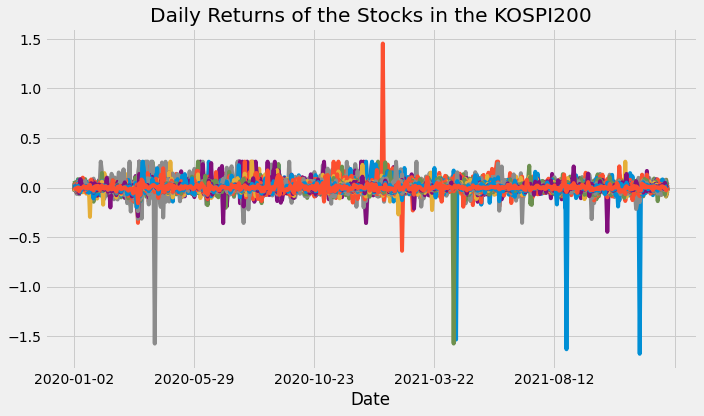

In [ ]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the KOSPI200')
plt.tight_layout()
# plt.savefig('tmp.png')
plt.show()

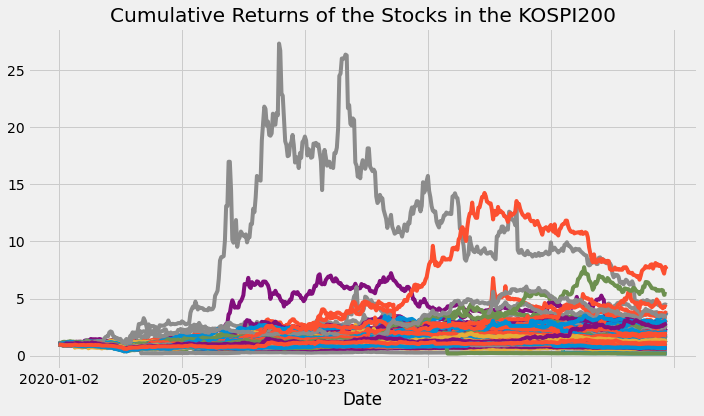

In [ ]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the KOSPI200')
plt.tight_layout()
# plt.savefig('tmp.png')
plt.show()

KOSPI200 종목의 제1 주성분 구하기
 - 200개의 차원을 가진, 200개 종목들의 선형 결합

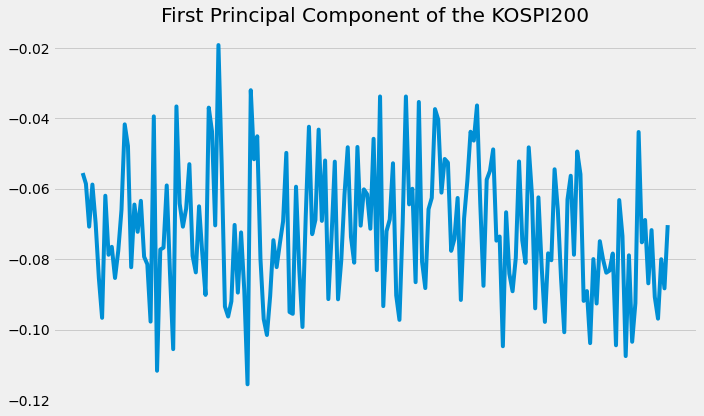

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(rs.fillna(0))

pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the KOSPI200')
plt.tight_layout()
# plt.savefig('tmp.png')
plt.show()

PCA 가중치를 이용하여 포트폴리오 구성

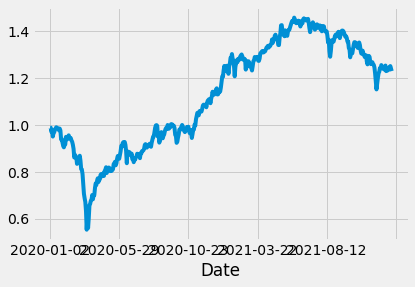

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:
prices = pd.read_csv('/content/drive/MyDrive/Project1_Stock_Price/datasets1/kospi_3yrs.csv', encoding='cp949')
prices

In [ ]:
prices = prices[['일자', '종가']]
prices.rename(columns = {'일자' : 'Date', '종가': 'KOSPI'}, inplace = True)
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')
prices.sort_index(inplace=True)

In [ ]:
prices.head()

In [ ]:
prices = prices.apply(np.log).diff(1)

In [ ]:
prices = prices['2020-01-01':'2021-12-31']

In [ ]:
prices

In [ ]:
myrs = pd.DataFrame(myrs)

In [ ]:
myrs.reset_index(inplace=True)
prices.reset_index(inplace=True)

In [ ]:
myrs['Date'] = pd.to_datetime(myrs['Date'])

In [ ]:
rs_df = pd.merge(myrs, prices, on='Date', how='left')
# pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ['Date', "PCA Portfolio", "KOSPI"]

In [ ]:
rs_df = rs_df.set_index('Date')

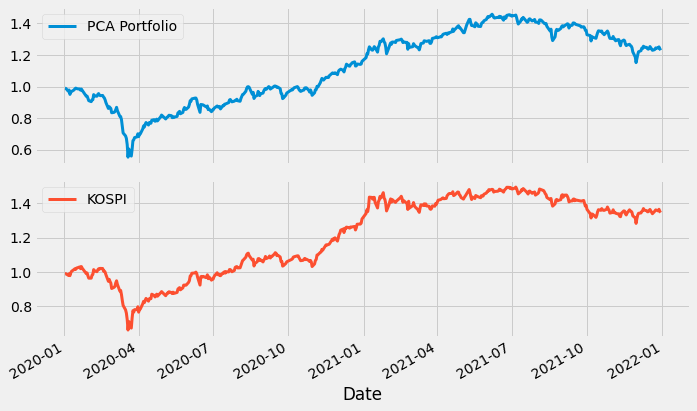

In [ ]:
rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
# plt.savefig('tmp.png')

위와 같이 PCA 포트폴리오는 시장요소의 대리변수로 역할할 수 있음

### PCA로 COVID19의 영향 분석
 - 사전지식 없이 팬데믹으로 인해 영향받은 종목들을 군집시킬 수 있음

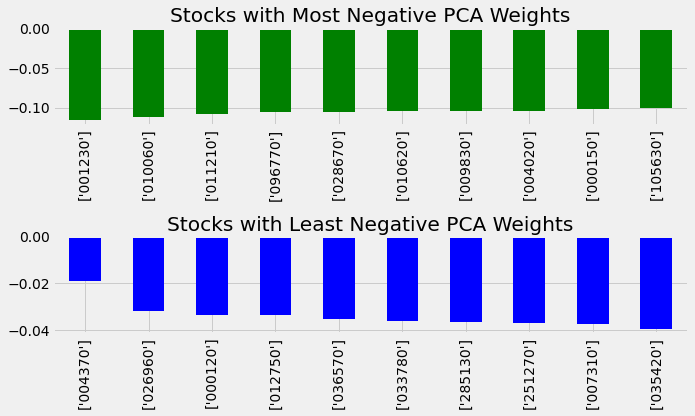

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
# plt.savefig('tmp.png')

가장 덜 영향받은 종목들로 수익성있는 포트폴리오도 구성 가능

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)


# myrs = rs[pc1.nlargest(10).index].mean(1)
# myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
# prices[:].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
# plt.legend(['PCA Selection', 'S&P500'])

# plt.tight_layout()
# # plt.savefig('tmp.png')

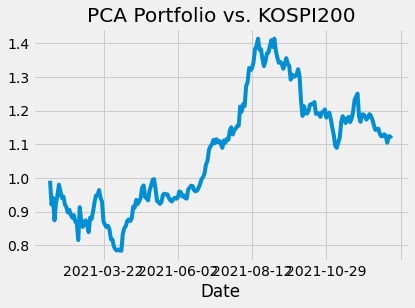

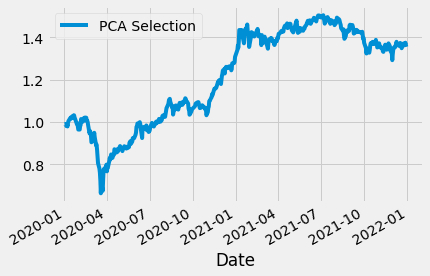

In [ ]:
myrs = rs[pc1.nlargest(10).index].mean(1)
mycrs = myrs.cumsum().apply(np.exp)
market_crs = prices.cumsum().apply(np.exp)
mycrs.plot(title='PCA Portfolio vs. KOSPI200')
market_crs.plot()
plt.legend(['PCA Selection', 'KOSPI200'])

In [ ]:
prices = prices.set_index('Date')